Incassi mese giugno 2025
Analisi degli incassi del mese giugno 2025 di un bar.
E' stato generato un file xlxs dall'app Billy scontrino relativo al periodo di interesse.
Il file xlxs generato somma i totali giornalieri e i totali giornalieri di ogni reparto. Il totale mensile viene quindi elaborato, ma non c'è un raggruppamento come il totale giornaliero di ogni giornata in quanto l'app, ad ogni scontrino digitale emesso, fa l'equivalente di una chiusura di cassa che viene immediatamente trasmessa all'agenzia delle entrate.

In [1]:
#importo le librerie necessarie
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
#importo il file xlsx
giu_25_inc = pd.read_excel('/home/matteoubuntu/Scrivania/learn/incassi/Billy _report_giu_25.xlsx', skiprows=1)
giu_25_inc.info()
#skiprows=1 serve per saltare la prima riga del file excel che contiene il titolo della tabella

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Data                  1251 non-null   object 
 1   Tipo                  1248 non-null   object 
 2   Numero                1248 non-null   object 
 3   Riferimento           1 non-null      object 
 4   Importo (€)           1251 non-null   float64
 5   Pagamento             1246 non-null   object 
 6   Bevande               165 non-null    float64
 7   Panini                47 non-null     float64
 8   Caffetteria           1086 non-null   float64
 9   Snack                 257 non-null    float64
 10  Gelati                17 non-null     float64
 11  Alcolici              58 non-null     float64
 12  Contanti              1191 non-null   float64
 13  Elettronico           64 non-null     float64
 14  Non riscosso servizi  3 non-null      float64
 15  Non riscosso beni    

In [3]:
giu_25_inc.head()
giu_25_inc.tail()

,Data,Tipo,Numero,Riferimento,Importo (€),Pagamento,Bevande,Panini,Caffetteria,Snack,Gelati,Alcolici,Contanti,Elettronico,Non riscosso servizi,Non riscosso beni,Non riscosso fattura,Buoni pasto
1247,2025-06-01 07:12:43,S,DCW2025/9457-7929,NaN,1.1,C,NaN,NaN,1.1,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN,NaN
1248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1249,Totale lordo,NaN,NaN,NaN,3984.0,NaN,388.0,165.0,2619.8,547.1,55.6,208.5,3592.9,271.1,0.0,0.0,0.0,0.0
1250,Totale annulli,NaN,NaN,NaN,-120.0,NaN,0.0,0.0,0.0,-120.0,0.0,0.0,-240.0,0.0,0.0,0.0,0.0,0.0
1251,Totale netto,NaN,NaN,NaN,3864.0,NaN,388.0,165.0,2619.8,427.1,55.6,208.5,3352.9,271.1,0.0,0.0,0.0,0.0


In [4]:
#le righe 1248 1249 1250 1251 non mi servono, le elimino
parole_chiave = ["Totale lordo", "Totale annulli", "Totale netto"]
giu_25_inc = giu_25_inc[~giu_25_inc["Data"].isin(parole_chiave)]

In [5]:
giu_25_inc.tail()

,Data,Tipo,Numero,Riferimento,Importo (€),Pagamento,Bevande,Panini,Caffetteria,Snack,Gelati,Alcolici,Contanti,Elettronico,Non riscosso servizi,Non riscosso beni,Non riscosso fattura,Buoni pasto
1244,2025-06-01 07:27:27,S,DCW2025/9457-8098,NaN,2.6,C,NaN,NaN,1.4,1.2,NaN,NaN,2.6,NaN,NaN,NaN,NaN,NaN
1245,2025-06-01 07:23:11,S,DCW2025/9457-8055,NaN,7.0,C,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1246,2025-06-01 07:13:37,S,DCW2025/9457-7938,NaN,2.3,C,NaN,NaN,1.1,1.2,NaN,NaN,2.3,NaN,NaN,NaN,NaN,NaN
1247,2025-06-01 07:12:43,S,DCW2025/9457-7929,NaN,1.1,C,NaN,NaN,1.1,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN,NaN
1248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#faccio una copia del dataframe per non modificare l'originale
giu_25_inc_copy = giu_25_inc.copy()
#cambio il nome di giu_25_inc_copy in incassi
incassi_giu_25 = giu_25_inc_copy


In [7]:
#elimino le colonne che non mi servono
incassi_giu_25 = incassi_giu_25.drop(columns=['Non riscosso servizi','Non riscosso beni', 'Non riscosso fattura', 'Buoni pasto' ])


In [8]:
incassi_giu_25.head()

,Data,Tipo,Numero,Riferimento,Importo (€),Pagamento,Bevande,Panini,Caffetteria,Snack,Gelati,Alcolici,Contanti,Elettronico
0,2025-06-30 13:55:25,S,DCW2025/0101-6040,NaN,6.5,C,2.0,4.5,NaN,NaN,NaN,NaN,6.5,NaN
1,2025-06-30 13:44:44,S,DCW2025/0101-3883,NaN,2.2,C,NaN,NaN,2.2,NaN,NaN,NaN,2.2,NaN
2,2025-06-30 13:00:27,S,DCW2025/0100-3602,NaN,1.5,C,NaN,NaN,1.5,NaN,NaN,NaN,1.5,NaN
3,2025-06-30 12:21:31,S,DCW2025/0099-4668,NaN,6.0,C,6.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN
4,2025-06-30 12:14:07,S,DCW2025/0099-3206,NaN,3.8,C,NaN,NaN,3.8,NaN,NaN,NaN,3.8,NaN


In [9]:
incassi_giu_25.info()





<class 'pandas.core.frame.DataFrame'>
Index: 1249 entries, 0 to 1248
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data         1248 non-null   object 
 1   Tipo         1248 non-null   object 
 2   Numero       1248 non-null   object 
 3   Riferimento  1 non-null      object 
 4   Importo (€)  1248 non-null   float64
 5   Pagamento    1246 non-null   object 
 6   Bevande      162 non-null    float64
 7   Panini       44 non-null     float64
 8   Caffetteria  1083 non-null   float64
 9   Snack        254 non-null    float64
 10  Gelati       14 non-null     float64
 11  Alcolici     55 non-null     float64
 12  Contanti     1188 non-null   float64
 13  Elettronico  61 non-null     float64
dtypes: float64(9), object(5)
memory usage: 146.4+ KB


In [10]:
incassi_giu_25.tail()

,Data,Tipo,Numero,Riferimento,Importo (€),Pagamento,Bevande,Panini,Caffetteria,Snack,Gelati,Alcolici,Contanti,Elettronico
1244,2025-06-01 07:27:27,S,DCW2025/9457-8098,NaN,2.6,C,NaN,NaN,1.4,1.2,NaN,NaN,2.6,NaN
1245,2025-06-01 07:23:11,S,DCW2025/9457-8055,NaN,7.0,C,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN
1246,2025-06-01 07:13:37,S,DCW2025/9457-7938,NaN,2.3,C,NaN,NaN,1.1,1.2,NaN,NaN,2.3,NaN
1247,2025-06-01 07:12:43,S,DCW2025/9457-7929,NaN,1.1,C,NaN,NaN,1.1,NaN,NaN,NaN,1.1,NaN
1248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#rimuovo le righe che hanno tutti NaN nei valori
incassi_giu_25 = incassi_giu_25.dropna(how='all')

In [12]:
incassi_giu_25.tail()

,Data,Tipo,Numero,Riferimento,Importo (€),Pagamento,Bevande,Panini,Caffetteria,Snack,Gelati,Alcolici,Contanti,Elettronico
1243,2025-06-01 07:36:30,S,DCW2025/9457-8239,NaN,2.3,C,NaN,NaN,1.1,1.2,NaN,NaN,2.3,NaN
1244,2025-06-01 07:27:27,S,DCW2025/9457-8098,NaN,2.6,C,NaN,NaN,1.4,1.2,NaN,NaN,2.6,NaN
1245,2025-06-01 07:23:11,S,DCW2025/9457-8055,NaN,7.0,C,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN
1246,2025-06-01 07:13:37,S,DCW2025/9457-7938,NaN,2.3,C,NaN,NaN,1.1,1.2,NaN,NaN,2.3,NaN
1247,2025-06-01 07:12:43,S,DCW2025/9457-7929,NaN,1.1,C,NaN,NaN,1.1,NaN,NaN,NaN,1.1,NaN


In [13]:
#rimuovo i NaN
incassi_giu_25 = incassi_giu_25.fillna(0)

In [14]:
incassi_giu_25.tail()

,Data,Tipo,Numero,Riferimento,Importo (€),Pagamento,Bevande,Panini,Caffetteria,Snack,Gelati,Alcolici,Contanti,Elettronico
1243,2025-06-01 07:36:30,S,DCW2025/9457-8239,0,2.3,C,0.0,0.0,1.1,1.2,0.0,0.0,2.3,0.0
1244,2025-06-01 07:27:27,S,DCW2025/9457-8098,0,2.6,C,0.0,0.0,1.4,1.2,0.0,0.0,2.6,0.0
1245,2025-06-01 07:23:11,S,DCW2025/9457-8055,0,7.0,C,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0
1246,2025-06-01 07:13:37,S,DCW2025/9457-7938,0,2.3,C,0.0,0.0,1.1,1.2,0.0,0.0,2.3,0.0
1247,2025-06-01 07:12:43,S,DCW2025/9457-7929,0,1.1,C,0.0,0.0,1.1,0.0,0.0,0.0,1.1,0.0


In [15]:
#cancello la colonna Riferimento e Numero che non mi servono
incassi_giu_25 = incassi_giu_25.drop(columns=['Riferimento','Numero'])




In [16]:
incassi_giu_25.head()

,Data,Tipo,Importo (€),Pagamento,Bevande,Panini,Caffetteria,Snack,Gelati,Alcolici,Contanti,Elettronico
0,2025-06-30 13:55:25,S,6.5,C,2.0,4.5,0.0,0.0,0.0,0.0,6.5,0.0
1,2025-06-30 13:44:44,S,2.2,C,0.0,0.0,2.2,0.0,0.0,0.0,2.2,0.0
2,2025-06-30 13:00:27,S,1.5,C,0.0,0.0,1.5,0.0,0.0,0.0,1.5,0.0
3,2025-06-30 12:21:31,S,6.0,C,6.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
4,2025-06-30 12:14:07,S,3.8,C,0.0,0.0,3.8,0.0,0.0,0.0,3.8,0.0


In [17]:
#elimino le righe con i valori uguali a 120 e -120, è un riferimento all'annullo di un pagamento
incassi_giu_25 = incassi_giu_25[~incassi_giu_25['Importo (€)'].isin([120, -120])]

In [18]:
incassi_giu_25['Data'] = pd.to_datetime(incassi_giu_25['Data'])
incassi_giu_25['Data'] = incassi_giu_25['Data'].dt.date

In [19]:
incassi_giu_25.head()

,Data,Tipo,Importo (€),Pagamento,Bevande,Panini,Caffetteria,Snack,Gelati,Alcolici,Contanti,Elettronico
0,2025-06-30,S,6.5,C,2.0,4.5,0.0,0.0,0.0,0.0,6.5,0.0
1,2025-06-30,S,2.2,C,0.0,0.0,2.2,0.0,0.0,0.0,2.2,0.0
2,2025-06-30,S,1.5,C,0.0,0.0,1.5,0.0,0.0,0.0,1.5,0.0
3,2025-06-30,S,6.0,C,6.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
4,2025-06-30,S,3.8,C,0.0,0.0,3.8,0.0,0.0,0.0,3.8,0.0


In [20]:
#riordino le data in ordine crescente
incassi_giu_25 = incassi_giu_25.sort_values(by='Data')

In [21]:
incassi_giu_25.head()

,Data,Tipo,Importo (€),Pagamento,Bevande,Panini,Caffetteria,Snack,Gelati,Alcolici,Contanti,Elettronico
1247,2025-06-01,S,1.1,C,0.0,0.0,1.1,0.0,0.0,0.0,1.1,0.0
1225,2025-06-01,S,4.4,C,0.0,0.0,2.4,2.0,0.0,0.0,4.4,0.0
1224,2025-06-01,S,2.4,C,0.0,0.0,2.4,0.0,0.0,0.0,2.4,0.0
1223,2025-06-01,S,1.0,C,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1222,2025-06-01,S,6.8,C,0.0,0.0,4.4,2.4,0.0,0.0,6.8,0.0


In [22]:
#raggruppo i dati per data e sommo gli importi
incassi_giu_25 = incassi_giu_25.groupby('Data').sum(numeric_only=True).reset_index()

In [23]:
incassi_giu_25.head(30)

,Data,Importo (€),Bevande,Panini,Caffetteria,Snack,Gelati,Alcolici,Contanti,Elettronico
0,2025-06-01,137.0,18.9,7.0,69.9,18.7,0.0,22.5,134.7,2.3
1,2025-06-02,93.0,5.0,2.5,42.9,23.1,0.0,19.5,93.0,0.0
2,2025-06-03,195.3,5.2,14.5,151.4,8.7,2.5,13.0,178.8,16.5
3,2025-06-04,147.1,7.5,4.5,124.2,8.4,0.0,2.5,138.1,9.0
4,2025-06-05,171.1,12.7,2.5,147.2,4.2,2.5,2.0,154.7,16.4
5,2025-06-06,135.5,7.3,7.0,65.4,35.3,12.5,8.0,127.1,8.4
6,2025-06-07,120.4,11.5,0.0,56.8,34.6,0.0,17.5,108.5,11.9
7,2025-06-08,169.9,9.2,9.5,123.2,6.0,0.0,22.0,150.2,19.7
8,2025-06-09,142.7,23.5,7.0,104.8,5.4,2.0,0.0,139.7,3.0
9,2025-06-10,152.4,17.0,2.5,81.4,38.9,12.6,0.0,152.4,0.0


In [24]:
incassi_giu_25 = incassi_giu_25.rename(columns={'Importo (€)':'Totale giornaliero'})
incassi_giu_25.head(30)

,Data,Totale giornaliero,Bevande,Panini,Caffetteria,Snack,Gelati,Alcolici,Contanti,Elettronico
0,2025-06-01,137.0,18.9,7.0,69.9,18.7,0.0,22.5,134.7,2.3
1,2025-06-02,93.0,5.0,2.5,42.9,23.1,0.0,19.5,93.0,0.0
2,2025-06-03,195.3,5.2,14.5,151.4,8.7,2.5,13.0,178.8,16.5
3,2025-06-04,147.1,7.5,4.5,124.2,8.4,0.0,2.5,138.1,9.0
4,2025-06-05,171.1,12.7,2.5,147.2,4.2,2.5,2.0,154.7,16.4
5,2025-06-06,135.5,7.3,7.0,65.4,35.3,12.5,8.0,127.1,8.4
6,2025-06-07,120.4,11.5,0.0,56.8,34.6,0.0,17.5,108.5,11.9
7,2025-06-08,169.9,9.2,9.5,123.2,6.0,0.0,22.0,150.2,19.7
8,2025-06-09,142.7,23.5,7.0,104.8,5.4,2.0,0.0,139.7,3.0
9,2025-06-10,152.4,17.0,2.5,81.4,38.9,12.6,0.0,152.4,0.0


In [25]:
somme = incassi_giu_25.sum(numeric_only=True)
riga_somme = riga_somme = pd.DataFrame(somme).transpose()
riga_somme.index = ['Totale']
incassi_giu_25_con_somme = pd.concat([incassi_giu_25, riga_somme])
incassi_giu_25_con_somme.head(31)


,Data,Totale giornaliero,Bevande,Panini,Caffetteria,Snack,Gelati,Alcolici,Contanti,Elettronico
0,2025-06-01,137.0,18.9,7.0,69.9,18.7,0.0,22.5,134.7,2.3
1,2025-06-02,93.0,5.0,2.5,42.9,23.1,0.0,19.5,93.0,0.0
2,2025-06-03,195.3,5.2,14.5,151.4,8.7,2.5,13.0,178.8,16.5
3,2025-06-04,147.1,7.5,4.5,124.2,8.4,0.0,2.5,138.1,9.0
4,2025-06-05,171.1,12.7,2.5,147.2,4.2,2.5,2.0,154.7,16.4
5,2025-06-06,135.5,7.3,7.0,65.4,35.3,12.5,8.0,127.1,8.4
6,2025-06-07,120.4,11.5,0.0,56.8,34.6,0.0,17.5,108.5,11.9
7,2025-06-08,169.9,9.2,9.5,123.2,6.0,0.0,22.0,150.2,19.7
8,2025-06-09,142.7,23.5,7.0,104.8,5.4,2.0,0.0,139.7,3.0
9,2025-06-10,152.4,17.0,2.5,81.4,38.9,12.6,0.0,152.4,0.0


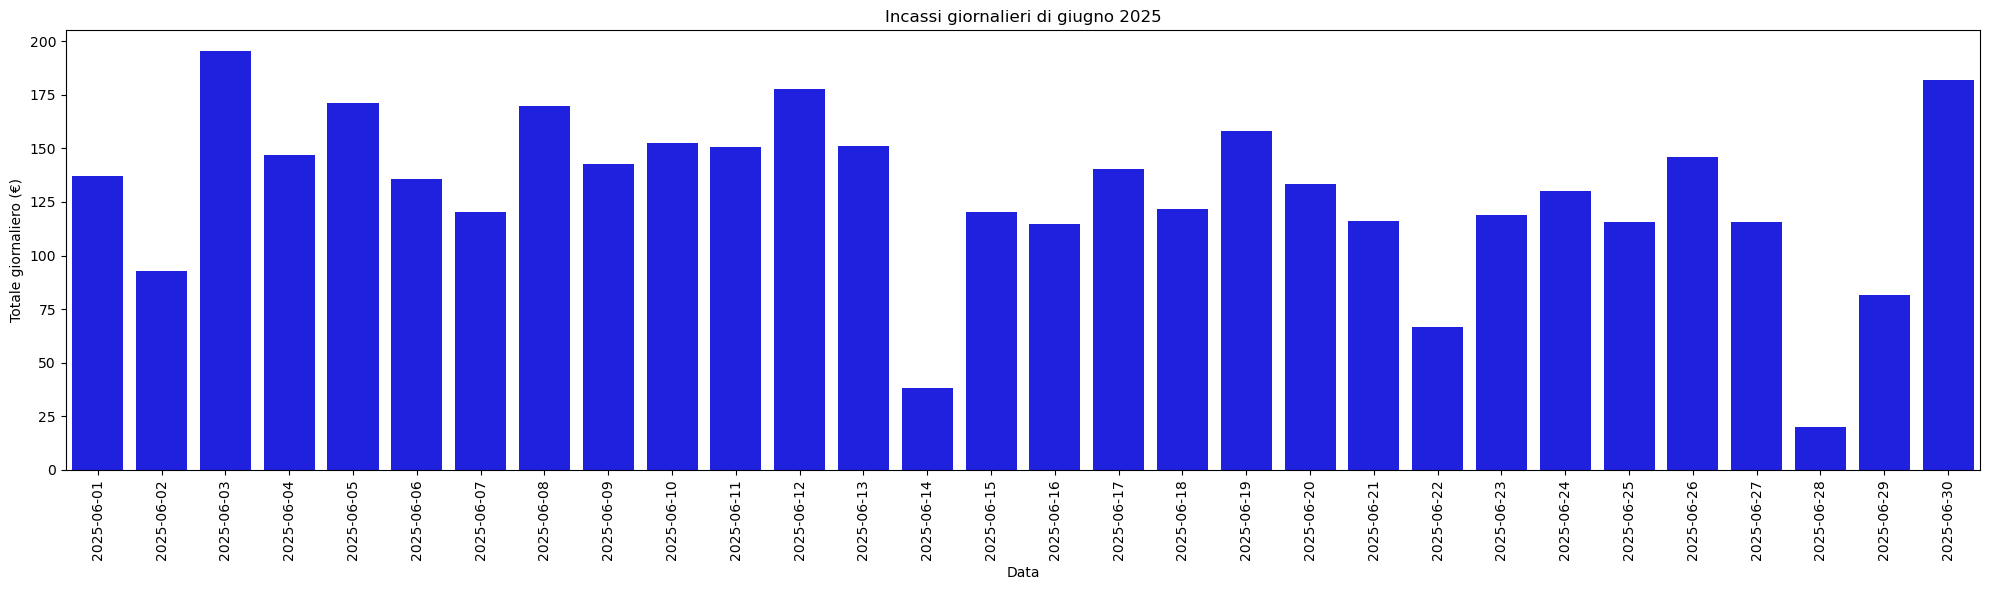

In [31]:
#realizzo un bar plot per visualizzare gli incassi giornalieri
plt.figure(figsize=(20, 6))
sns.barplot(x='Data', y='Totale giornaliero', data=incassi_giu_25_con_somme[:-1], color='blue')
plt.xticks(rotation=90)
plt.title('Incassi giornalieri di giugno 2025')
plt.xlabel('Data')
plt.ylabel('Totale giornaliero (€)')
plt.tight_layout()